In [ ]:
#circ = zx.generate.CNOT_HAD_PHASE_circuit(qubits=1000000,depth=100,clifford=False)
#with open("C:\\Users\\valte\OneDrive - University of Helsinki\\Desktop\\zxlive\\test.json", "r") as f:
#    jsonfile = json.load(f)
#g = json_to_graph(jsonfile)

#zx.draw(g, labels=True)

In [3]:
import pyzx as zx
import json

with open("../example.json", "r") as f:
    graph = zx.Graph.from_json(json.load(f))

In [4]:
zx.draw(graph)

In [ ]:


qubits = 10
c = zx.Circuit(qubits)

# Create a simple circuit with Hadamard gates
for i in range(qubits):
    c.add_gate("HAD", i)
    c.add_gate("HAD", i)

zx.draw(c)
print(c.stats())

Circuit  on 10 qubits with 20 gates.
        0 is the T-count
        20 Cliffords among which
        0 2-qubit gates (0 CNOT, 0 other) and
        20 Hadamard gates.


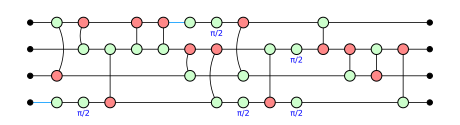

In [1]:
import pyzx as zx
zx.settings.drawing_backend = 'matplotlib'
circuit = zx.generate.CNOT_HAD_PHASE_circuit(qubits=4,depth=20,clifford=True)
zx.draw(circuit)

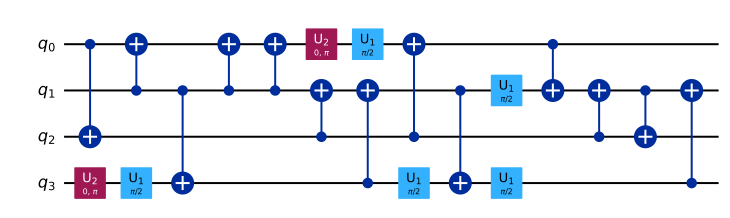

In [2]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

qiskit_circ = QuantumCircuit.from_qasm_str(circuit.to_qasm())
qiskit_circ = qiskit_circ.decompose()
circuit_drawer(qiskit_circ, output='mpl', filename='deutsch_n2.png')

Circuit  on 8 qubits with 100 gates.
        19 is the T-count
        81 Cliffords among which
        66 2-qubit gates (66 CNOT, 0 other) and
        15 Hadamard gates.
spider_simp: 29. 18. 13. 6. 4. 2.  6 iterations
id_simp: 8. 1.  2 iterations
spider_simp: 6. 1.  2 iterations
pivot_simp: 13. 7. 3. 2. 2. 1. 1. 1.  8 iterations
lcomp_simp: 2. 2.  2 iterations


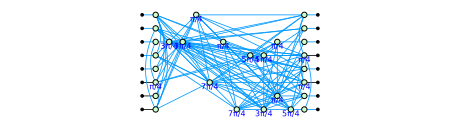

In [4]:
c = zx.generate.CNOT_HAD_PHASE_circuit(qubits=8, depth=100)
print(c.stats())
g = c.to_graph()
zx.full_reduce(g, quiet=False) # simplifies the Graph in-place, and show the rewrite steps taken.
g.normalize() # Makes the graph more suitable for displaying
zx.draw(g) # Display the resulting diagram

In [5]:
c_opt = zx.extract_circuit(g.copy())

In [6]:
g = c.to_graph()
zx.teleport_reduce(g)
c_opt = zx.Circuit.from_graph(g) # This function is able to reconstruct a Circuit from a Graph that looks sufficiently like a Circuit

In [7]:
zx.compare_tensors(c,c_opt) # Returns True if c and c_opt implement the same circuit (up to global phase)

True